Eintracht Frankfurt Jogando em casa


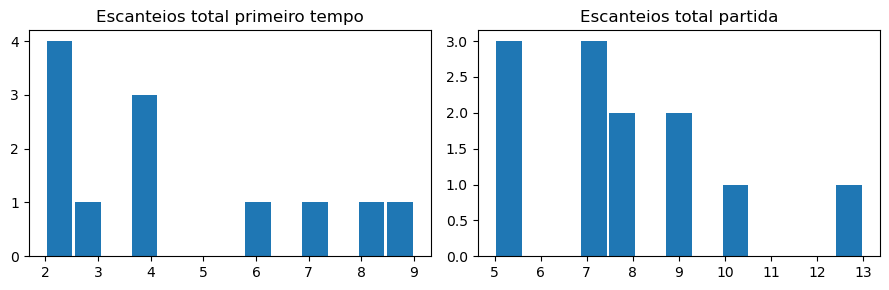

 PRIMEIRO TEMPO: 
1H 80% das partidas - de 7.5 escanteios
1H 90% das partidas + de  1.5 escanteios
1H partidas com menos de 6.5  75 %
1H partidas com menos de 5.5  67 %
1H partidas com menos de 4.5  67 %
1H partidas com mais de 0.5  100 %
1H partidas com mais de 1.5  100 %
1H partidas com mais de 2.5  67 %
JOGO COMPLETO: 
FT 80% das partidas - de  9.5 escanteios
FT 90% das partidas + de  4.5 escanteios
Partidas com saldo de escanteios positivo:  67 %
Partidas com saldo de escanteios negativo:  25 %
Partidas escanteios empatados:  8 %
Média escanteios por partida:  8
desvio padrão:  2


,first_half_corners_for,second_half_corners_for,match_corners_for,first_half_corners_against,second_half_corners_against,match_corners_against,total_match_corners,total_first_half_corners,total_second_half_corners,home_or_away,corners_balance,against
0,8,2,10,0,0,0,10,8,2,Home,10,Greuther Furth
3,1,2,3,1,1,2,5,2,3,Home,1,VfB Stuttgart
6,3,1,4,6,3,9,13,9,4,Home,-5,Napoli
7,2,3,5,0,2,2,7,2,5,Home,3,Werder Bremen
9,1,3,4,1,3,4,8,2,6,Home,0,Darmstadt
10,3,4,7,0,1,1,8,3,5,Home,6,Hertha Berlin
13,4,1,5,3,1,4,9,7,2,Home,1,Schalke
14,2,1,3,0,2,2,5,2,3,Home,1,Lech Poznan
16,4,0,4,2,1,3,7,6,1,Home,1,Sandhausen
20,3,1,4,1,4,5,9,4,5,Home,-1,TSG Hoffenheim


Bochum Jogando fora de casa


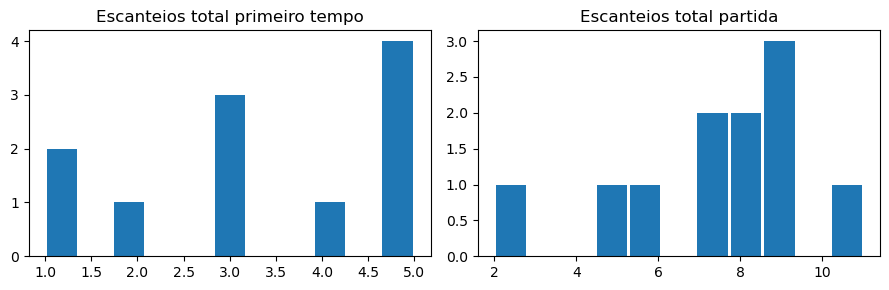

 PRIMEIRO TEMPO: 
1H 80% das partidas - de 5.5 escanteios
1H 90% das partidas + de  0.5 escanteios
1H partidas com menos de 6.5  100 %
1H partidas com menos de 5.5  100 %
1H partidas com menos de 4.5  64 %
1H partidas com mais de 0.5  100 %
1H partidas com mais de 1.5  82 %
1H partidas com mais de 2.5  73 %
JOGO COMPLETO: 
FT 80% das partidas - de  9.5 escanteios
FT 90% das partidas + de  4.5 escanteios
Partidas com saldo de escanteios positivo:  18 %
Partidas com saldo de escanteios negativo:  73 %
Partidas escanteios empatados:  9 %
Média escanteios por partida:  7
desvio padrão:  2


,first_half_corners_for,second_half_corners_for,match_corners_for,first_half_corners_against,second_half_corners_against,match_corners_against,total_match_corners,total_first_half_corners,total_second_half_corners,home_or_away,corners_balance,against
1,0,1,1,3,4,7,8,3,5,Away,-6,Cologne
3,0,0,0,1,1,2,2,1,1,Away,-2,Werder Bremen
5,1,2,3,3,3,6,9,4,5,Away,-3,Bayern Munich
8,0,2,2,1,2,3,5,1,4,Away,-1,Mainz
9,3,1,4,0,3,3,7,3,4,Away,1,Bayer Leverkusen
15,1,1,2,2,4,6,8,3,5,Away,-4,Augsburg
17,3,2,5,2,0,2,7,5,2,Away,3,Borussia Dortmund
18,1,1,2,1,6,7,9,2,7,Away,-5,Wolfsburg
20,2,3,5,3,3,6,11,5,6,Away,-1,Elversberg
21,2,1,3,3,0,3,6,5,1,Away,0,VfB Stuttgart


In [60]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

def get_corner_stats(team_url:str,is_home:bool):
    html = requests.get(team_url).content

    soup = BeautifulSoup(html, 'html.parser')

    team_name = soup.find("meta", {"name":"description"})["content"]
    team_name = team_name.split(",")[0].replace('Team: ','')
    first_half_corners_for = []
    second_half_corners_for = []
    match_corners_for = []
    first_half_corners_against = []
    second_half_corners_against = []
    match_corners_against = []
    total_match_corners = []
    total_first_half_corners = []
    total_second_half_corners =[]
    home_or_away = []
    corners_balance =[]
    against = []



    table_rows = soup.findAll("tr")
    for rows in table_rows:
        #skip future games
        if rows.find("span", class_="span_half_corner hide"):
            continue
        match = rows.find("td", class_="match_home")
        if match != None:
            home_team = match.find('a').text
        else:
            continue
        match = rows.find("td", class_="match_away")
        if match != None:
            away_team = match.find('a').text
        half_corners = rows.find("span", class_="span_half_corner").text
        match_corners = rows.find("span", class_="span_match_corner").text
        home_half_corners = half_corners.replace('(','').replace(')','').split('-')[0]
        away_half_corners = half_corners.replace('(','').replace(')','').split('-')[1]
        home_match_corners = match_corners.split(' ')[0]
        away_match_corners = match_corners.split(' ')[-1]
        home_second_half_corners = int(home_match_corners) - int(home_half_corners)
        away_second_half_corners = int(away_match_corners) - int(away_half_corners)
        if home_team == team_name:
            against.append(away_team)            
            balance = int(home_match_corners) - int(away_match_corners)
            first_half_corners_for.append(int(home_half_corners))
            second_half_corners_for.append(int(home_second_half_corners))
            match_corners_for.append(int(home_match_corners))
            first_half_corners_against.append(int(away_half_corners))
            second_half_corners_against.append(int(away_second_half_corners))
            match_corners_against.append(int(away_match_corners))
            total_match_corners.append(int(home_match_corners) + int(away_match_corners))
            total_first_half_corners.append(int(home_half_corners) + int(away_half_corners))
            total_second_half_corners.append(int(home_second_half_corners) + int(away_second_half_corners))
            home_or_away.append('Home')
            corners_balance.append(balance)

        else:
            against.append(home_team)  
            balance = int(away_match_corners) - int(home_match_corners)
            first_half_corners_for.append(int(away_half_corners))
            second_half_corners_for.append(int(away_second_half_corners))
            match_corners_for.append(int(away_match_corners))
            first_half_corners_against.append(int(home_half_corners))
            second_half_corners_against.append(int(home_second_half_corners))
            match_corners_against.append(int(home_match_corners))
            total_match_corners.append(int(home_match_corners) + int(away_match_corners))
            total_first_half_corners.append(int(home_half_corners) + int(away_half_corners))
            total_second_half_corners.append(int(home_second_half_corners) + int(away_second_half_corners))
            home_or_away.append('Away')
            corners_balance.append(balance)

    df = pd.DataFrame(list(zip(
            first_half_corners_for,
            second_half_corners_for,
            match_corners_for,
            first_half_corners_against,
            second_half_corners_against,
            match_corners_against,
            total_match_corners,
            total_first_half_corners,
            total_second_half_corners,
            home_or_away,
            corners_balance,
            against
        )),
        columns=[
            'first_half_corners_for',
            'second_half_corners_for',
            'match_corners_for',
            'first_half_corners_against',
            'second_half_corners_against',
            'match_corners_against',
            'total_match_corners',
            'total_first_half_corners',
            'total_second_half_corners',
            'home_or_away',
            'corners_balance',
            'against'

        ])
    if is_home:
        return (team_name, df[(df.home_or_away == "Home")])
    else:
        return (team_name, df[(df.home_or_away == "Away")])


#team_url = input("Url totalcorner do time da casa\n")
#team2_url = input("Url totalcorner do time visitante\n")
team_url = "https://www.totalcorner.com/team/view/283"
team2_url = "https://www.totalcorner.com/team/view/295"

 
home_name, df_home = get_corner_stats(team_url,True)
away_name, df_away = get_corner_stats(team2_url,False)
print(home_name, "Jogando em casa")
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.hist(df_home.total_first_half_corners.tolist(), int(df_home.total_match_corners.quantile(1)), rwidth=0.9)
plt.title("Escanteios total primeiro tempo")
plt.plot()
plt.subplot(1, 2, 2)
plt.hist(df_home.total_match_corners.tolist(), int(df_home.total_match_corners.quantile(1)), rwidth=0.9)
plt.title("Escanteios total partida")
plt.plot()
plt.tight_layout()
plt.show()

print(" PRIMEIRO TEMPO: ")
print('1H 80% das partidas - de', df_home.total_first_half_corners.quantile(0.8,interpolation="higher")+0.5, "escanteios")
print('1H 90% das partidas + de ', df_home.total_first_half_corners.quantile(0.1, interpolation="lower")-0.5, "escanteios")
print('1H partidas com menos de 6.5 ', round((df_home.total_first_half_corners < 7).mean()*100), "%")
print('1H partidas com menos de 5.5 ', round((df_home.total_first_half_corners < 6).mean()*100), "%")
print('1H partidas com menos de 4.5 ', round((df_home.total_first_half_corners < 5).mean()*100), "%")
print('1H partidas com mais de 0.5 ', round((df_home.total_first_half_corners > 0).mean()*100), "%")
print('1H partidas com mais de 1.5 ', round((df_home.total_first_half_corners > 1).mean()*100), "%")
print('1H partidas com mais de 2.5 ', round((df_home.total_first_half_corners > 2).mean()*100), "%")
print("JOGO COMPLETO: ")
print('FT 80% das partidas - de ', df_home.total_match_corners.quantile(0.8,interpolation="higher")+0.5, "escanteios")
print('FT 90% das partidas + de ', df_home.total_match_corners.quantile(0.1,interpolation="lower")-0.5, "escanteios")
print('Partidas com saldo de escanteios positivo: ', round((df_home.corners_balance > 0).mean()*100), "%")
print('Partidas com saldo de escanteios negativo: ', round((df_home.corners_balance < 0).mean()*100), "%")
print('Partidas escanteios empatados: ', round((df_home.corners_balance == 0).mean()*100), "%")
print('Média escanteios por partida: ', round((df_home.total_match_corners).mean()))
print('desvio padrão: ', round((df_home.total_match_corners).std()))
display(df_home)


print(away_name,"Jogando fora de casa")
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.hist(df_away.total_first_half_corners.tolist(), int(df_away.total_match_corners.quantile(1)), rwidth=0.9)
plt.title("Escanteios total primeiro tempo")
plt.plot()
plt.subplot(1, 2, 2)
plt.hist(df_away.total_match_corners.tolist(), int(df_away.total_match_corners.quantile(1)), rwidth=0.9)
plt.title("Escanteios total partida")
plt.plot()
plt.tight_layout()
plt.show()
print(" PRIMEIRO TEMPO: ")
print('1H 80% das partidas - de', df_away.total_first_half_corners.quantile(0.8,interpolation="higher")+.5, "escanteios")
print('1H 90% das partidas + de ', df_away.total_first_half_corners.quantile(0.1, interpolation="lower")-.5, "escanteios")
print('1H partidas com menos de 6.5 ', round((df_away.total_first_half_corners < 7).mean()*100), "%")
print('1H partidas com menos de 5.5 ', round((df_away.total_first_half_corners < 6).mean()*100), "%")
print('1H partidas com menos de 4.5 ', round((df_away.total_first_half_corners < 5).mean()*100), "%")
print('1H partidas com mais de 0.5 ', round((df_away.total_first_half_corners > 0).mean()*100), "%")
print('1H partidas com mais de 1.5 ', round((df_away.total_first_half_corners > 1).mean()*100), "%")
print('1H partidas com mais de 2.5 ', round((df_away.total_first_half_corners > 2).mean()*100), "%")
print("JOGO COMPLETO: ")
print('FT 80% das partidas - de ', df_away.total_match_corners.quantile(0.8,interpolation="higher")+.5, "escanteios")
print('FT 90% das partidas + de ', df_away.total_match_corners.quantile(0.1,interpolation="lower")-.5, "escanteios")
print('Partidas com saldo de escanteios positivo: ', round((df_away.corners_balance > 0).mean()*100), "%")
print('Partidas com saldo de escanteios negativo: ', round((df_away.corners_balance < 0).mean()*100), "%")
print('Partidas escanteios empatados: ', round((df_away.corners_balance == 0).mean()*100), "%")
print('Média escanteios por partida: ', round((df_away.total_match_corners).mean()))
print('desvio padrão: ', round((df_away.total_match_corners).std()))
display(df_away)
